In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import tree
%matplotlib inline  

In [91]:
heart = pd.read_csv('HeartDiseaseData.csv')

In [92]:
heart.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [93]:
heart.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [94]:
heart.shape

(457, 14)

In [95]:
heart.size

6398

In [96]:
heart.describe()

,Unnamed: 0,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


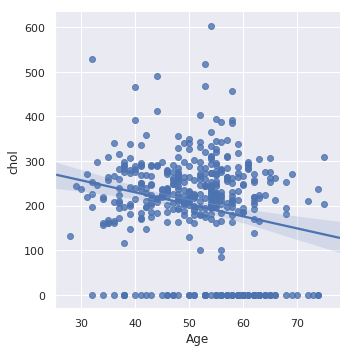

In [97]:
sns.lmplot(x='Age', y='chol', data=heart)

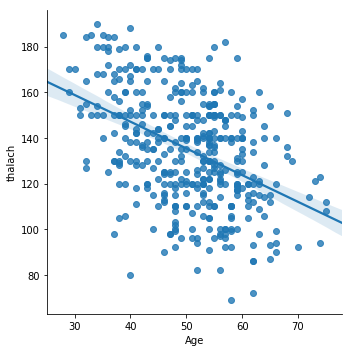

In [14]:
sns.lmplot(x='Age', y='thalach', data=heart)

In [98]:
heart_n = heart.fillna({'trestbps': heart.trestbps.median()})

In [99]:
heart_n = heart_n.fillna({'chol': heart.chol.median()})

In [100]:
heart_n = heart_n.fillna({'thalach': heart.thalach.median()})

In [101]:
heart_n = heart_n.fillna({'oldpeak': heart.oldpeak.median()})

In [102]:
heart_n.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,220.0,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [103]:
X = heart_n.drop('num', axis=1)
y = heart_n.num

In [104]:
X.isnull().sum()

Unnamed: 0     0
ID             0
Age            0
Sex            0
cp             0
trestbps       0
chol           0
fbs           54
restecg        2
thalach        0
exang         33
oldpeak        0
Place          0
dtype: int64

In [21]:
heart_n.Sex.replace(('male', 'female'), (1, 0), inplace=True)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [105]:
heart_n.cp.replace(('atypical angina', 'typical angina', 'non-anginal pain', 'asymptomatic'), (0, 1, 2, 3), inplace=True)


In [106]:
heart_n.fbs.replace(('False', 'True'), (0, 1), inplace=True)


In [107]:
heart_n.restecg.unique()


array(['showing probable or definite left ventricular hypertrophy by Estes criteria',
       'normal',
       'having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV',
       nan], dtype=object)

In [108]:
heart_n.restecg.replace(('showing probable or definite left ventricular hypertrophy by Estes criteria', 'normal', 'having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV'), (0, 1, 2), inplace=True)


In [109]:
heart_n.Place.unique()


array(['Hungary', 'Switzerland', 'VA'], dtype=object)

In [110]:
heart_n.Place.replace(('Hungary', 'Switzerland', 'VA'), (0, 1, 2), inplace=True)


In [111]:
heart_n.fbs.unique()


array([False, nan, True], dtype=object)

In [112]:
heart_n.fbs.replace((False, True), (0, 1), inplace=True)


In [115]:
heart_n.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,0,130.0,132.0,0.0,0.0,185.0,no,0.0,0,0
1,2,2,29,male,0,120.0,243.0,0.0,1.0,160.0,no,0.0,0,0
2,3,3,29,male,0,140.0,220.0,0.0,1.0,170.0,no,0.0,0,0
3,4,4,30,female,1,170.0,237.0,0.0,2.0,170.0,no,0.0,0,0
4,5,5,31,female,0,100.0,219.0,0.0,2.0,150.0,no,0.0,0,0


In [116]:
heart_n.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp              int64
trestbps      float64
chol          float64
fbs           float64
restecg       float64
thalach       float64
exang          object
oldpeak       float64
num             int64
Place           int64
dtype: object

In [117]:
heart_no_ID = heart_n.drop('ID', axis=1)

In [118]:
heart_no_ID = heart_no_ID.drop(heart_no_ID.columns[[0]], axis=1)

In [119]:
heart_no_ID.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,0,130.0,132.0,0.0,0.0,185.0,no,0.0,0,0
1,29,male,0,120.0,243.0,0.0,1.0,160.0,no,0.0,0,0
2,29,male,0,140.0,220.0,0.0,1.0,170.0,no,0.0,0,0
3,30,female,1,170.0,237.0,0.0,2.0,170.0,no,0.0,0,0
4,31,female,0,100.0,219.0,0.0,2.0,150.0,no,0.0,0,0


In [120]:
heart_no_ID.dtypes

Age           int64
Sex          object
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang        object
oldpeak     float64
num           int64
Place         int64
dtype: object

In [121]:
heart_no_ID.exang.unique()


array(['no', 'yes', nan], dtype=object)

In [122]:
heart_no_ID.exang.replace(('no', 'yes'), (0, 1), inplace=True)

In [123]:
heart_no_ID.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,0,130.0,132.0,0.0,0.0,185.0,0.0,0.0,0,0
1,29,male,0,120.0,243.0,0.0,1.0,160.0,0.0,0.0,0,0
2,29,male,0,140.0,220.0,0.0,1.0,170.0,0.0,0.0,0,0
3,30,female,1,170.0,237.0,0.0,2.0,170.0,0.0,0.0,0,0
4,31,female,0,100.0,219.0,0.0,2.0,150.0,0.0,0.0,0,0


In [126]:
heart_no_ID.head()

,Age,Sex,cp,trestbps,chol,thalach,oldpeak,num,Place
0,28,male,0,130.0,132.0,185.0,0.0,0,0
1,29,male,0,120.0,243.0,160.0,0.0,0,0
2,29,male,0,140.0,220.0,170.0,0.0,0,0
3,30,female,1,170.0,237.0,170.0,0.0,0,0
4,31,female,0,100.0,219.0,150.0,0.0,0,0


In [143]:
heart_no_NA = heart_no_ID.dropna()


In [152]:
heart_no_NA.isna().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
thalach     0
oldpeak     0
num         0
Place       0
dtype: int64

In [155]:
heart_no_ID.Sex.unique()


array(['male', 'female'], dtype=object)

In [171]:
heart_no_ID.chol.unique()


array([132., 243., 220., 237., 219., 198., 225., 254., 298., 161., 214.,
       160., 167., 308., 264., 166., 340., 209., 260., 211., 173., 283.,
       194., 223., 315., 275., 297., 292., 182., 200., 204., 241., 339.,
       147., 273., 307., 289., 215., 281., 250., 184., 245., 291., 295.,
       269., 196., 268., 228., 358., 201., 249., 266., 186., 207., 218.,
       412., 224., 238., 230., 163., 240., 280., 257., 263., 276., 284.,
       195., 227., 253., 187., 202., 328., 168., 216., 129., 190., 188.,
       179., 210., 272., 180., 100., 259., 468., 274., 320., 221., 309.,
       312., 171., 208., 246., 305., 217., 365., 344., 394., 256., 326.,
       277., 270., 229.,  85., 347., 251., 222., 287., 318., 213., 294.,
       193., 271., 156., 267., 282., 117., 466., 247., 226., 265., 206.,
       288., 303., 338., 248., 306., 529., 392., 231., 329., 355., 233.,
       242., 603., 255., 172., 175., 290., 341., 234., 342., 404., 518.,
       285., 279., 388., 164., 336., 491., 205., 21

In [156]:
heart_no_ID.Sex.replace(('male', 'female'), (0, 1), inplace=True)


In [158]:
heart_no_ID.dtypes

Age           int64
Sex           int64
cp            int64
trestbps    float64
chol        float64
thalach     float64
oldpeak     float64
num           int64
Place         int64
dtype: object

In [160]:
X = heart_no_ID.drop('num', axis=1)
y = heart_no_ID.num

In [173]:
np.where(np.isnan(X)) 

(array([], dtype=int64), array([], dtype=int64))

In [174]:
np.nan_to_num(X)

array([[ 28.,   0.,   0., ..., 185.,   0.,   0.],
       [ 29.,   0.,   0., ..., 160.,   0.,   0.],
       [ 29.,   0.,   0., ..., 170.,   0.,   0.],
       ...,
       [ 62.,   0.,   1., ..., 135.,   0.,   2.],
       [ 58.,   0.,   3., ..., 135.,   0.,   2.],
       [ 62.,   0.,   0., ...,  93.,   0.,   2.]])

In [177]:
X

,Age,Sex,cp,trestbps,chol,thalach,oldpeak,Place
0,28,0,0,130.0,132.0,185.0,0.0,0
1,29,0,0,120.0,243.0,160.0,0.0,0
2,29,0,0,140.0,220.0,170.0,0.0,0
3,30,1,1,170.0,237.0,170.0,0.0,0
4,31,1,0,100.0,219.0,150.0,0.0,0
5,32,1,0,105.0,198.0,165.0,0.0,0
6,32,0,0,110.0,225.0,184.0,0.0,0
7,32,0,0,125.0,254.0,155.0,0.0,0
8,33,0,2,120.0,298.0,185.0,0.0,0
9,34,1,0,130.0,161.0,190.0,0.0,0


In [175]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
clf.score(X, y)

1.0

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [179]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
clf.score(X_train, y_train)

1.0

In [181]:
clf.score(X_test, y_test)

0.6688741721854304

In [182]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [183]:
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept]}))

In [184]:
classifier_score_data.head()

,test_score,train_score,max_dept
0,0.715232,0.771242,1
0,0.715232,0.771242,2
0,0.754967,0.781046,3
0,0.695364,0.826797,4
0,0.735099,0.839869,5


In [185]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

In [186]:
classifier_score_data.head()

,max_dept,set_type,score
0,1,test_score,0.715232
1,2,test_score,0.715232
2,3,test_score,0.754967
3,4,test_score,0.695364
4,5,test_score,0.735099


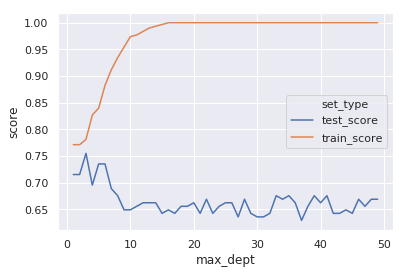

In [187]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)

In [190]:
cross_val_scores.mean()

0.7584875727128504